**Meng-import Package yang diperlukan**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh');sns.set()


**Meng-input dataset CSV berupa sekumpulan data iklan penjualan rumah di Kota Makassar yang diperoleh di website (rumah123.com) tahun 2021**


In [25]:
from google.colab import files
rumah = files.upload()

Saving Tugas 01 Data Mining - Kelompok 11.csv to Tugas 01 Data Mining - Kelompok 11.csv


In [28]:
rumah = pd.read_csv('Tugas 01 Data Mining - Kelompok 11.csv')

Mengetahui ukuran dan tipe data

In [29]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          100 non-null    int64  
 1   Tgl_Iklan   100 non-null    object 
 2   url         100 non-null    object 
 3   harga_juta  100 non-null    float64
 4   Kota        100 non-null    object 
 5   LT          100 non-null    int64  
 6   LB          100 non-null    int64  
 7   KT          100 non-null    int64  
 8   KM          100 non-null    int64  
 9   KTP         100 non-null    int64  
 10  KMP         100 non-null    int64  
 11  carport     100 non-null    int64  
 12  garasi      100 non-null    int64  
 13  listrik     100 non-null    int64  
 14  surat       100 non-null    object 
 15  judul       100 non-null    object 
 16  deskripsi   100 non-null    object 
dtypes: float64(1), int64(10), object(6)
memory usage: 13.4+ KB


Mengetahui jumlah baris dan kolom pada dataset

In [30]:
print(type(rumah))

N, P = rumah.shape
"baris = ", N," kolom = ",P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ' kolom = ', 17)

**PREPOCESSING DATA**

Menghapus kolom 'no' karena data dalam kolom 'no' sangat beragam sehingga tidak diperlukan dalam analisis

In [ ]:
rumah.drop('no', axis=1, inplace=True)

Menampilkan 10 data secara random

In [36]:
rumah.sample(10)

,Tgl_Iklan,url,harga_juta,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
16,25/03/21,https://www.rumah123.com/properti/makassar/hos...,1200.0,Makassar,105,210,4,2,0,0,0,0,1300,SHM,"rumah sudut, siap huni, cocok usaha, cafe, 2 l...",Rumah Dijual Makassar rumah 2 lantai kamar 4 k...
21,24/03/21,https://www.rumah123.com/properti/makassar/hos...,5500.0,Makassar,495,200,4,3,1,1,0,0,2200,SHM,Rumah Tengah Kota Untuk Tempat Tinggal,"Rumah Dijualsewa Makassar, k.tidur 4+1,k. mand..."
9,01/04/21,https://www.rumah123.com/properti/makassar/hos...,1950.0,Makassar,112,160,4,3,0,0,1,0,0,none,Rumah di Makassar Ready Summarecon Makassar 2 ...,Rumah di Makassar Ready Summarecon Makassar 2 ...
10,01/04/21,https://www.rumah123.com/properti/makassar/hos...,1500.0,Makassar,135,108,3,2,0,0,1,1,1300,SHM,Rumah Lili,"Rumah Dijual Makassar Perumahan Lili, Dekat Ma..."
11,30/03/21,https://www.rumah123.com/properti/makassar/hos...,350.0,Makassar,72,36,2,1,0,0,1,0,1300,SHM,RUMAH MURAH DI DAYA PROMO DP 10%,Rumah cantik lokasi daya biring kanaya\r\nType...
73,14/03/2021,https://www.rumah123.com/properti/makassar/hos...,858.0,Makassar,105,100,3,2,0,0,1,0,2200,SHM,Runah 2 Lantai Dekat Bandara dan Poros Perinti...,Tipe Primerose
37,19/03/2021,https://www.rumah123.com/properti/makassar/hos...,1800.0,Makassar,135,160,4,4,0,0,1,0,1300,SHM,Rumah Minimalis,Rumah Dijual Makassar Rumah 2 lantai
85,10/03/21,https://www.rumah123.com/properti/makassar/hos...,2000.0,Makassar,91,60,3,2,0,0,1,0,1300,SHM,Rumah siap Huni dkt Jl. Perintis kemerdekaan,Rumah Dijual Makassar
83,11/03/21,https://www.rumah123.com/properti/makassar/hos...,1650.0,Makassar,153,200,5,4,0,0,0,0,2200,SHM,Rumah Mewah 2 Lantai lokasi pusat kota Makassa...,Hunian mewah lokasi strategis di pengayoman be...
89,09/03/21,https://www.rumah123.com/properti/makassar/hos...,650.0,Makassar,90,56,2,1,0,0,1,0,1300,SHM,Rumah murah minimalis siap huni di tengah kota...,Rumah Siap Huni Dalam Kota & Bebas Banjir\r\n\...


Cek apakah ada duplikat atau tidak?
Bedasarkan hasil diperoleh 0 artinya tidak ditemukan duplikat dalam data

In [ ]:
print(rumah.shape)
rumah.duplicated().sum()

(100, 16)


0

Memilih tipe data float dan integer dari dataset

In [ ]:
jr_num = rumah.select_dtypes(include = ['float', 'int64'])
jr_num

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,1000.0,128,49,2,2,0,0,0,0,2200
1,1550.0,160,256,2,1,1,1,1,0,2200
2,80000.0,1400,555,5,4,2,1,1,0,16500
3,3700.0,175,350,3,2,1,0,1,1,3500
4,1200.0,105,70,3,1,0,0,0,0,2200
...,...,...,...,...,...,...,...,...,...,...
95,1000.0,126,112,3,2,0,0,0,0,2200
96,535.0,72,70,3,2,0,0,0,0,0
97,850.0,95,80,3,2,0,0,1,0,2200
98,900.0,120,80,2,2,0,0,1,0,2200


Memilih tipe data string dari dataset

In [ ]:
jr_obj = rumah.select_dtypes(include = ['object'])
jr_obj

,Tgl_Iklan,url,Kota,surat,judul,deskripsi
0,05/04/21,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Murah Tengah Kota Dekat Pettarani,dijual rumah makassar harga murah dalam kota. ...
1,05/04/21,https://www.rumah123.com/properti/makassar/hos...,Makassar,HGB,Rumah Asri Citraland Red Burgundy,Rumah Dijualsewa Makassar Dalam Cluster
2,05/04/21,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Lokasi Strategis Pinggir Jalan Raya dan ...,"Rumah 2 lantai dengan Spesifikasi, sebagai ber..."
3,05/04/21,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Cantik,"Rumah Dijual Makassar Rumah Tengah Kota, 100 m..."
4,05/04/21,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Cantik Asri Tanjung Bunga Makassar,One Gate System Aman dan Nyaman Lingkungan Bag...
...,...,...,...,...,...,...
95,08/03/2021,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Amaryllis,Rumah Dijual Makassar Dengan Perabot\r\nDekat ...
96,08/03/2021,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Minimalis 3 kamar belakang Polda perinti...,Rumah Minimalis 3 kamar belakang Polda perinti...
97,08/03/2021,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah mewah minimalis TYPE 80 dekat dari Mall ...,Rumah minimalis Harga Murah Citra Hertasning M...
98,08/03/2021,https://www.rumah123.com/properti/makassar/hos...,Makassar,SHM,Rumah Asri Clove,Rumah Dijualsewa Makassar Siap Huni


Mengubah tipe data surat dari string ke kategori

In [37]:
df = pd.get_dummies(rumah['surat'],prefix='sertifikat')
df.head()

,sertifikat_HGB,sertifikat_SHM,sertifikat_none
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


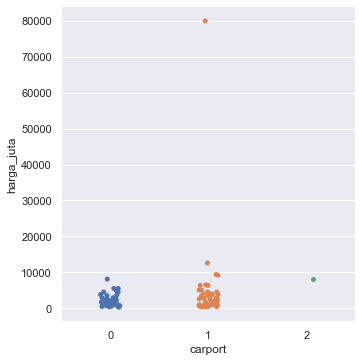

In [ ]:
import seaborn as sns

p=sns.catplot(x="carport", y="harga_juta", data=rumah)

#terdapat outlier pada data 

Melihat apakah terdapat outlier dalam data

C:\Users\Lukman Hakim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lukman Hakim\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


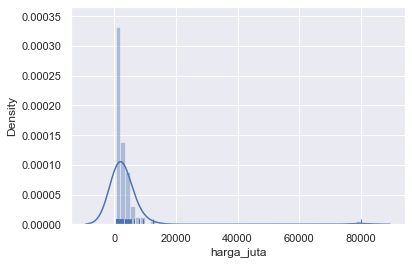

In [ ]:
p=sns.distplot(rumah['harga_juta'], kde=True, rug=True)

Menghapus outlier

In [41]:
df=np.abs(rumah.harga_juta-rumah.harga_juta.mean())<=(2*rumah.harga_juta.std())
print(df.shape)
df.head()

(100,)


0     True
1     True
2    False
3     True
4     True
Name: harga_juta, dtype: bool

**Data tanpa Outlier**

In [42]:
rumah2 = rumah[df]
print(rumah2.shape, rumah.shape)

(99, 16) (100, 16)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


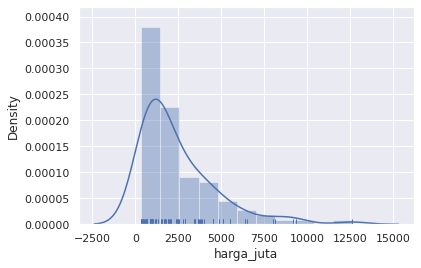

In [43]:
p=sns.distplot(rumah2['harga_juta'], kde=True, rug=True)

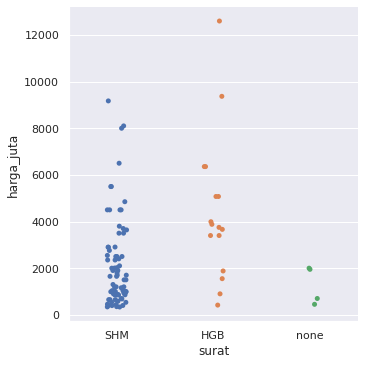

In [44]:
p=sns.catplot(x="surat", y="harga_juta", data=rumah2)

**Missing Value**

In [60]:
print(rumah2.isnull().sum())

Tgl_Iklan     0
url           0
harga_juta    0
Kota          0
LT            0
LB            0
KT            0
KM            0
KTP           0
KMP           0
carport       0
garasi        0
listrik       0
surat         0
judul         0
deskripsi     0
dtype: int64


Berdasarkan hasil yang diperoleh 0 artinya data bebas dari missing value

**Statistika Deskriptif**

In [61]:
rumah2.describe()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2471.852525,161.474747,159.484848,3.363636,2.606061,0.303030,0.262626,0.545455,0.191919,2337.373737
std,2272.814407,105.439251,114.944651,1.207583,1.141233,0.579489,0.506808,0.520454,0.420805,1263.101613
min,335.000000,55.000000,36.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,899.100000,90.500000,71.500000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
50%,1800.000000,128.000000,128.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,3500.000000,200.000000,207.000000,4.000000,3.000000,1.000000,0.000000,1.000000,0.000000,2200.000000
max,12598.000000,609.000000,600.000000,10.000000,6.000000,3.000000,3.000000,2.000000,2.000000,5500.000000


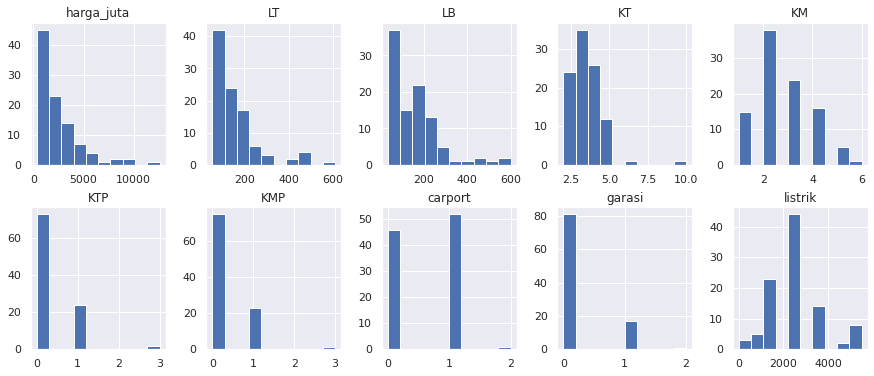

In [47]:
numerical = rumah2.select_dtypes(include = ['int64','float64']).columns

rumah2[numerical].hist(figsize=(15, 6), layout=(2,5));

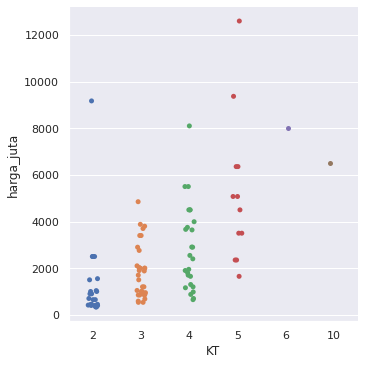

In [48]:
p= sns.catplot(x="KT", y="harga_juta", data=rumah2)

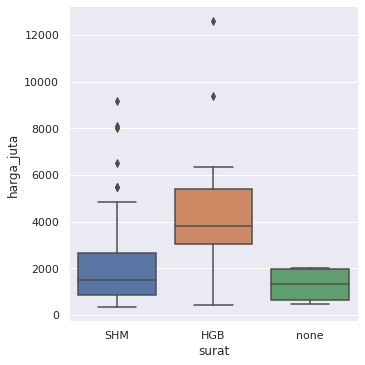

In [49]:
p = sns.catplot(x="surat", y="harga_juta", kind="box",  data=rumah2)

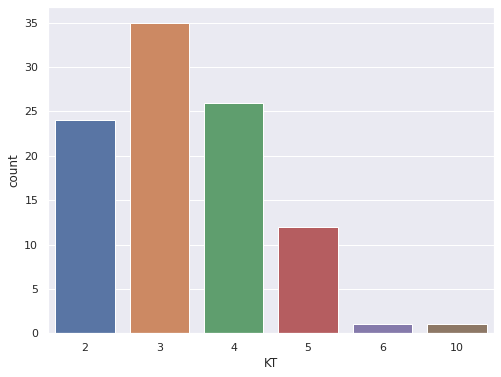

In [50]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="KT", data=rumah2)

In [51]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

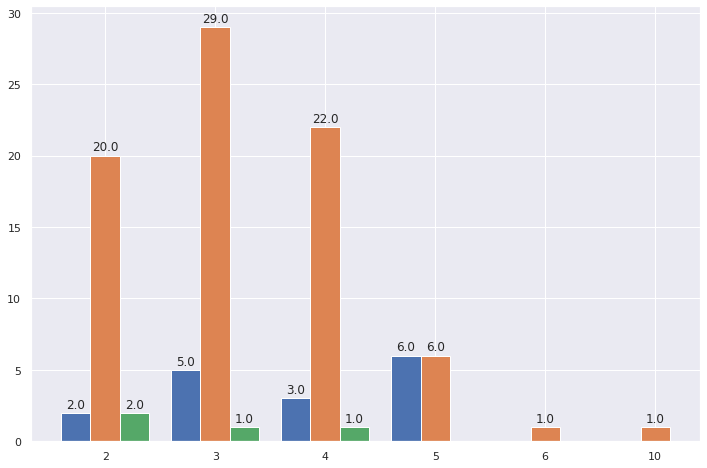

In [52]:
counts = rumah2.groupby(["KT", "surat"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

In [53]:
rumah2.groupby(["surat", "KT"]).size().unstack()

KT,2,3,4,5,6,10
surat,,,,,,
HGB,2.0,5.0,3.0,6.0,NaN,NaN
SHM,20.0,29.0,22.0,6.0,1.0,1.0
none,2.0,1.0,1.0,NaN,NaN,NaN


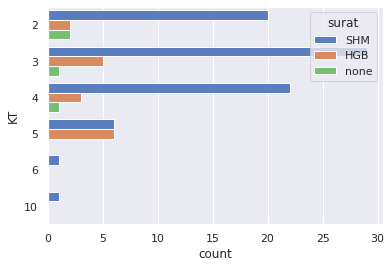

In [54]:
ax = sns.countplot(y = 'KT', hue = 'surat', palette = 'muted', data=rumah2)

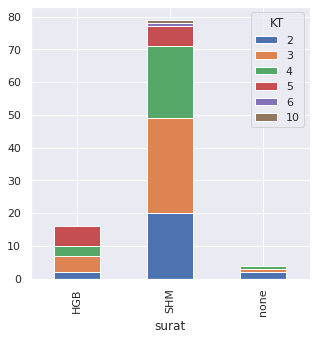

In [55]:
CT = pd.crosstab(index=rumah2["surat"], columns=rumah2["KT"])
p = CT.plot(kind="bar", figsize=(5,5), stacked=True)

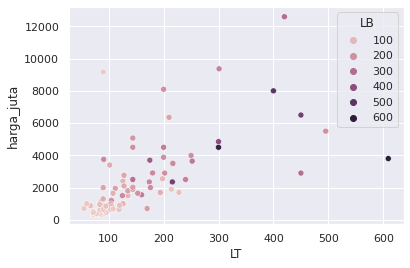

In [57]:
p=sns.scatterplot(x=rumah2['LT'], y=rumah2['harga_juta'], hue=rumah2['LB'])


Berdasarkan hasil scatter plot dapat dilihat bahwa terdapat hubungan posistif antara variabel LT dengan harga_juta karena titik-titik plot data membentuk pola garis lurus dari kiri bawah naik ke kanan atas

In [58]:
rumah2.corr()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
harga_juta,1.000000,0.631165,0.545681,0.556148,0.588170,0.229068,0.190937,0.216810,0.181693,0.642870
LT,0.631165,1.000000,0.739086,0.469138,0.394111,0.235936,0.217622,-0.015924,0.183290,0.459323
LB,0.545681,0.739086,1.000000,0.513754,0.479943,0.308601,0.228131,0.073655,0.318086,0.491373
KT,0.556148,0.469138,0.513754,1.000000,0.838030,0.074235,0.092459,0.249442,0.122309,0.431194
KM,0.588170,0.394111,0.479943,0.838030,1.000000,0.136061,0.163058,0.262382,0.137790,0.442834
KTP,0.229068,0.235936,0.308601,0.074235,0.136061,1.000000,0.907568,-0.079970,0.135681,0.302222
KMP,0.190937,0.217622,0.228131,0.092459,0.163058,0.907568,1.000000,-0.084405,0.144023,0.210861
carport,0.216810,-0.015924,0.073655,0.249442,0.262382,-0.079970,-0.084405,1.000000,0.076241,0.097508
garasi,0.181693,0.183290,0.318086,0.122309,0.137790,0.135681,0.144023,0.076241,1.000000,0.095796
listrik,0.642870,0.459323,0.491373,0.431194,0.442834,0.302222,0.210861,0.097508,0.095796,1.000000


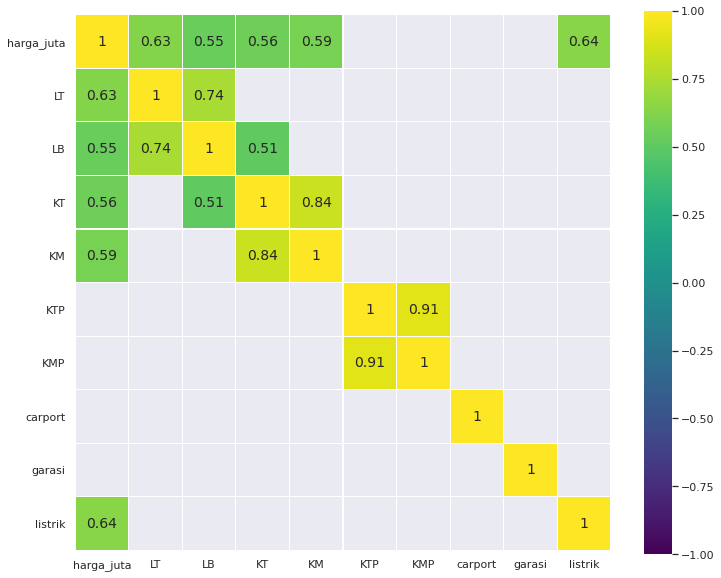

In [59]:
corr2 = rumah2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Kesimpulan:
Dari 100 data iklan pejualan rumah di Makassar ditemukan 1 outlier, kita remove sehingga tersisa 99 data yang diobservasi. Lalu menghapus kolom 'no' karena data terlalu beragam. Untuk melihat kergaman data, kami melakukan Statistika deskriptif. Kami ingin mengetahui hubungan antara variabel 'harga_juta' dan 'LT', berdasarkan hasil visualisasi dengan scatterplot diperoleh variabel 'harga_juta' dan variabel 'LT' memiliki hubungan yang positif, artinya semakin besar nilai luas tanah maka harga jual rumah juga semakin besar jika diasumsikan luas bangunan, kamar tidur, kamar mandi, kamar tidur pembantu, kamar mandi pembantu, carport, garasi, dan listrik sama.Dilihat dari tabel korelasi diperoleh bahwa variabel 'listrik' memiliki hubungan korelasi paling besar dengan harga rumah.